# Aim

- End to End example of classication problem with Iris dataset in sklearn

## Get data

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

Check to see imbalance in dataset:

In [5]:
import pandas as pd
ypd = pd.DataFrame(y,columns=['target'])
ypd['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

#### drop one class so is binary classification task

In [6]:
drop_ind = ypd[ypd.target !=2].index

In [7]:
X = X[drop_ind]

In [8]:
y = y[drop_ind]

In [9]:
y.shape

(100,)

In [10]:
X.shape

(100, 4)

In [11]:
pd.DataFrame(X).plot()

## Make test train split

I dont think that *train_test_split* is lookin to keep an even number distribution of classes in each set. But i guess normally your train/test split is large enough that you are likley to get a good representation of each class.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=38)


In [13]:
X_train.shape

(67, 4)

In [14]:
import pandas as pd
pd.DataFrame(y_train,columns=['target'])['target'].value_counts()

1    34
0    33
Name: target, dtype: int64

## Make basic reg model

This model does not reuqire hyper-parameter tuning and so no CrossValidation is needed. We just fit to the training data and the model is ready for evaluation onthe test data.

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lgr = LogisticRegression(C=10000) # high C value makes into normal logistic regression

In [17]:
clf1 = lgr.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
clf1.get_params()

{'C': 10000,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
clf1.coef_

array([[-1.4802293 , -4.4498269 ,  7.2885779 ,  3.04144057]])

### Model eval

Using test data to eval model perf.

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
clf1_pred = clf1.predict(X_test)

In [22]:
accuracy_score(y_test, clf1_pred)

1.0

#### Get precision/recal and ROC curves

In [24]:
from sklearn.metrics import precision_recall_curve,roc_curve

In [25]:
clf1_prob = clf1.predict_proba(X_test)[:,1] # why am i using this column? not the other? (other than has strange resuls in roc curves)

In [26]:
from sklearn.metrics import roc_auc_score
print('auc: ', roc_auc_score(y_test, clf1_prob).round(2)) # NOTE: unsure if should be using prob for this?!

auc:  1.0


In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_test, clf1_prob)

In [28]:
fpr,tpr,thresholds_ROC = roc_curve(y_test,clf1_prob)

In [29]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


Text(0,0.5,'T positve rate')

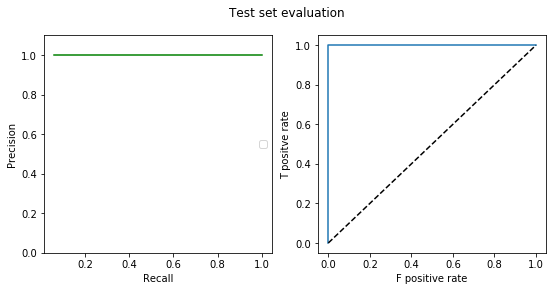

In [30]:
#### create plot
label = 'Test set evaluation'
fig,ax = plt.subplots(1,2,figsize=(9,4))
fig.suptitle(label)

#def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
# ax[0].plot(thresholds,precisions[:-1],'b--',label='Prec')
# ax[0].plot(thresholds,recalls[:-1],'g-',label='Reca')
# ax[0].set_xlabel('Threshold')
# ax[0].set_ylabel('')
# ax[0].legend(frameon=True,loc='center right')
# ax[0].set_ylim([0,1])

ax[0].plot(recalls[:-1],precisions[:-1],'g-') #,label='Reca')
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')
ax[0].legend(frameon=True,loc='center right')
ax[0].set_ylim([0,1.1])

ax[1].plot(fpr,tpr)
ax[1].plot([0,1],[0,1],'k--')
ax[1].set_xlabel('F positive rate')
ax[1].set_ylabel('T positve rate')

#print model perforamnce stats
# y_pred = clf1.predict(X_test)
# print('accuracy: ',accuracy_score(y_test,y_pred).round(2))
# print('precision: ', precision_score(y_test,y_pred).round(2))
# print('recall: ', recall_score(y_test,y_pred).round(2))


In [31]:
def plot_model_perf(ydata,Xdata,model,label):
    """
    plot:
    recall, prec, vs. threshold
    prec vs. recall
    ROC
    """
    #### get decision function
    if hasattr(model, 'predict_proba'):
        ydata_predDF = model.predict_proba(Xdata)[:,1]
    else:
        ydata_predDF = model.decision_function(Xdata)# warning, some model dont have DF
        print('No predicit_proba, DF used instead')

    #### get threshold + ROC curve data
    precisions, recalls, thresholds = precision_recall_curve(ydata,ydata_predDF)
    fpr,tpr,thresholds_ROC = roc_curve(ydata,ydata_predDF)

    #### create plot
    fig,ax = plt.subplots(1,3,figsize=(15,4))
    fig.suptitle(label)

    #def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
    ax[0].plot(thresholds,precisions[:-1],'b--',label='Prec')
    ax[0].plot(thresholds,recalls[:-1],'g-',label='Reca')
    ax[0].set_xlabel('Threshold')
    ax[0].set_ylabel('')
    ax[0].legend(frameon=True,loc='center right')
    ax[0].set_ylim([0,1])

    ax[1].plot(recalls[:-1],precisions[:-1],'g-') #,label='Reca')
    ax[1].set_ylabel('Precision')
    ax[1].set_xlabel('Recall')
    ax[1].legend(frameon=True,loc='center right')
    ax[1].set_ylim([0,1])

    ax[2].plot(fpr,tpr)
    ax[2].plot([0,1],[0,1],'k--')
    ax[2].set_xlabel('F positive rate')
    ax[2].set_ylabel('T positve rate')

    #print model perforamnce stats
    y_pred = model.predict(Xdata)
    print('accuracy: ',accuracy_score(ydata,y_pred).round(2))
    print('precision: ', precision_score(ydata,y_pred).round(2))
    print('recall: ', recall_score(ydata,y_pred).round(2))
    from sklearn.metrics import roc_auc_score
    print('auc: ', roc_auc_score(ydata, y_pred).round(2))

    return


## Make SVC with model selection

In [32]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf2 = GridSearchCV(svc, parameters, cv=5, scoring='f1')
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [35]:
clf2_pred = clf2.predict(X_test)

In [36]:
accuracy_score(y_test, clf2_pred)

1.0

In [38]:
clf2.cv_results_

{'mean_fit_time': array([0.00079751, 0.00059929, 0.00059929, 0.00080023]),
 'mean_score_time': array([0.00059857, 0.00079756, 0.00039892, 0.00081172]),
 'mean_test_score': array([1., 1., 1., 1.]),
 'mean_train_score': array([1., 1., 1., 1.]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'rank_test_score': array([1, 1, 1, 1]),
 'split0_test_score': array([1., 1., 1., 1.]),
 'split0_train_score': array([1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1.]),
 'split1_train_score': array([1., 1., 1., 1.]),
 'split2_test_score': array([1., 1., 1., 1.]),
 'split2_train_score': ar

# Conclusion

- Iris data set (with only two classes) can produce perfect classifiers? It is therefore linearly seperable?

In [39]:
import seaborn as sns
sns.set()

In [40]:
xpd = pd.DataFrame(X)

In [41]:
xpd = xpd.merge(ypd,right_index=True,left_index=True)

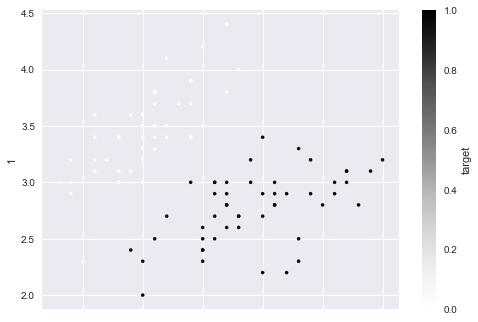

In [42]:
xpd.plot.scatter(0,1,10,'target')